In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [208]:
data=pd.read_csv("milknew.csv")

In [209]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [210]:
data.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [211]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [212]:
data.shape

(1059, 8)

In [213]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [214]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


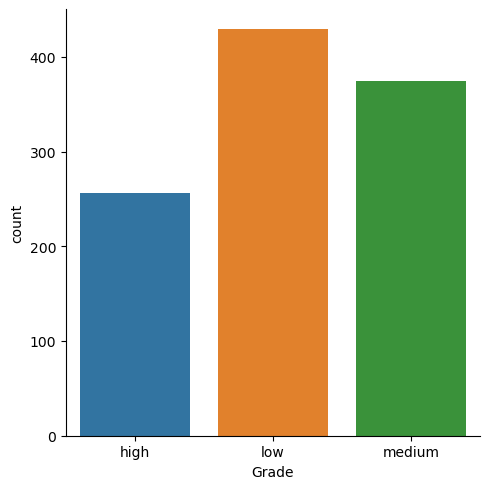

In [215]:
sns.catplot(x='Grade',data=data,kind='count')

<Axes: xlabel='Grade', ylabel='Taste'>

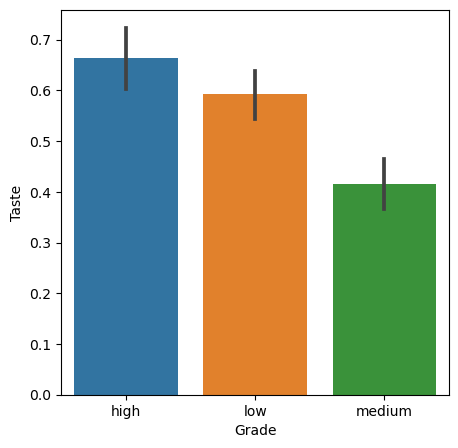

In [216]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Grade',y='Taste',data=data)

In [217]:
correlation=data.corr()

C:\Users\Vansh Dhiman\AppData\Local\Temp\ipykernel_16124\1603153744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

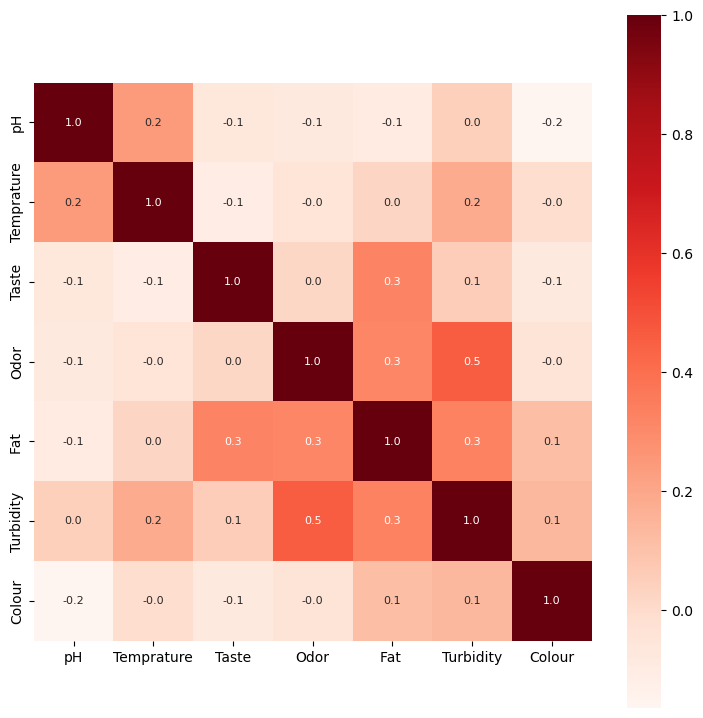

In [218]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [219]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [220]:
data['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

In [221]:
data['Temprature'].value_counts

<bound method IndexOpsMixin.value_counts of 0       35
1       36
2       70
3       34
4       37
        ..
1054    45
1055    38
1056    40
1057    43
1058    55
Name: Temprature, Length: 1059, dtype: int64>

In [222]:
data['Taste'].value_counts()

1    579
0    480
Name: Taste, dtype: int64

In [223]:
data['Colour'].value_counts()

255    628
250    146
245    115
247     48
246     44
240     32
248     23
253     22
254      1
Name: Colour, dtype: int64

In [224]:
data.head()
data=data.drop('Colour',axis=1)

In [225]:
X=data.drop('Grade',axis=1)
Y=data['Grade']

In [226]:
print(X)

       pH  Temprature  Taste  Odor  Fat   Turbidity
0     6.6          35      1     0     1          0
1     6.6          36      0     1     0          1
2     8.5          70      1     1     1          1
3     9.5          34      1     1     0          1
4     6.6          37      0     0     0          0
...   ...         ...    ...   ...   ...        ...
1054  6.7          45      1     1     0          0
1055  6.7          38      1     0     1          0
1056  3.0          40      1     1     1          1
1057  6.8          43      1     0     1          0
1058  8.6          55      0     1     1          1

[1059 rows x 6 columns]


In [227]:
print(Y)

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object


In [228]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [229]:
print(X.shape,X_train.shape,X_test.shape)

(1059, 6) (847, 6) (212, 6)


In [230]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [231]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [232]:
print(test_data_accuracy)

0.9905660377358491


In [233]:
X.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity'], dtype='object')

In [237]:
input_data=(7.0,36,1,0,1,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print('Milk-Quality is:',prediction[0])

Milk-Quality is: medium


C:\Users\Vansh Dhiman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [235]:
import pickle

In [203]:
pickle.dump((model),open('model_llrr.pkl','wb'))
model.lr=pickle.load(open('model_llrr.pkl','rb'))